### stage 2: Business Data Storytelling


In [1]:
import talib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir


C:\Users\benja\Anaconda3\envs\bert\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\benja\Anaconda3\envs\bert\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\benja\Anaconda3\envs\bert\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


nr. 0/5174
Dataset smaller then 800 skipping ...
nr. 1/5174


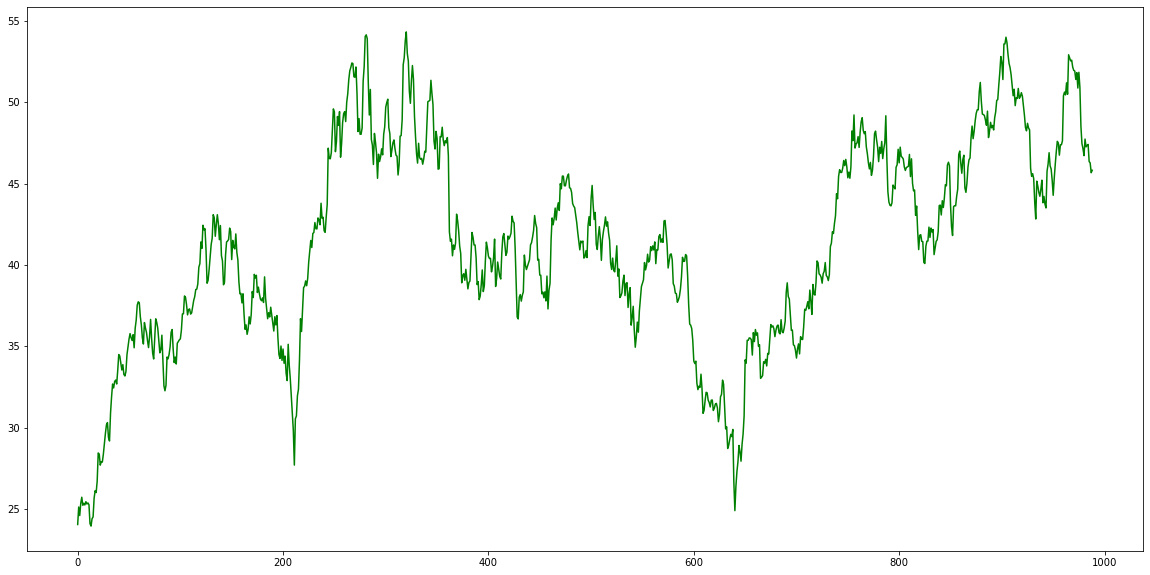

nr. 2/5174


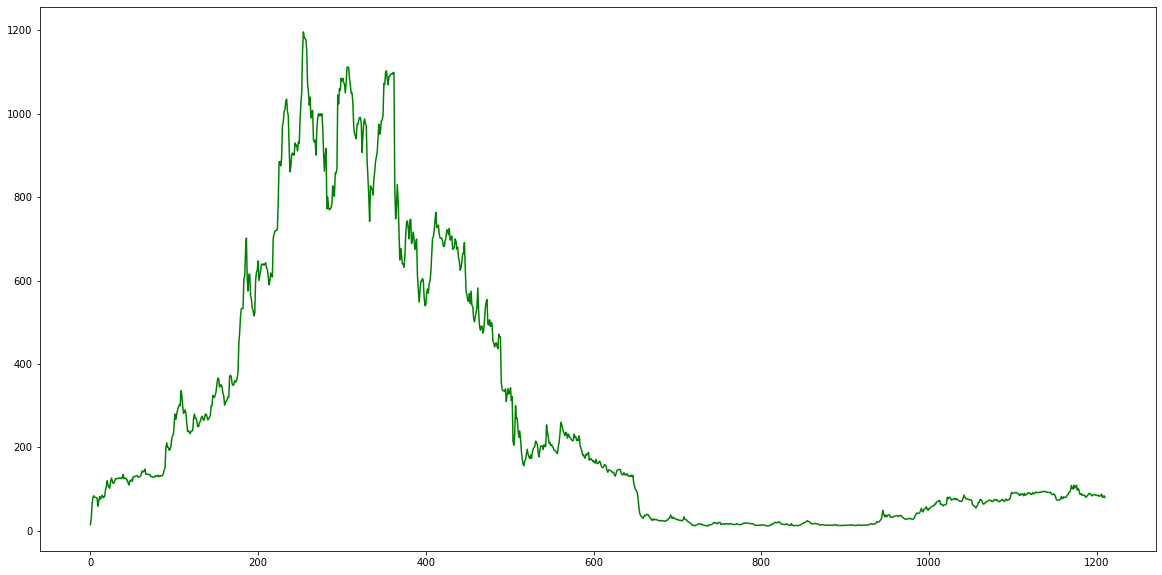

In [59]:
path = r"./data/stocks/"
files = listdir(path)# many crypto 

for indx, file in enumerate(files[4:7]):
    print("nr. "+str(indx) +"/"+ str(len(files[:])))
    indx = 2
    dataset = pd.DataFrame()
    dataset = pd.read_csv(path + file)
    if len(dataset) < 800 and indx != 0:
      print("Dataset smaller then 800 skipping ...")
      continue
    dataset["Open"] = dataset["Open"].astype(float)
    dataset["High"] = dataset["High"].astype(float)
    dataset["Low"] = dataset["Low"].astype(float)
    dataset["Close"] = dataset["Close"].astype(float)
    dataset = dataset.reset_index()
    dataset = dataset[['Close', 'High', 'Low', 'Open']]
    # dataset = dataset[['Close']]
    dataset = dataset.dropna()
    plt.figure(figsize=(20, 10))
    plt.plot(dataset["Close"],color='g', label='close price')
    plt.show()

In [78]:
dataset['RSI'] = talib.RSI(dataset['Close'].values, timeperiod=20)
dataset['30day MA'] = dataset['Close'].shift(1).rolling(window=30).mean()
dataset['140day MA'] = dataset['Close'].shift(1).rolling(window=140).mean()
dataset.dropna(inplace=True)

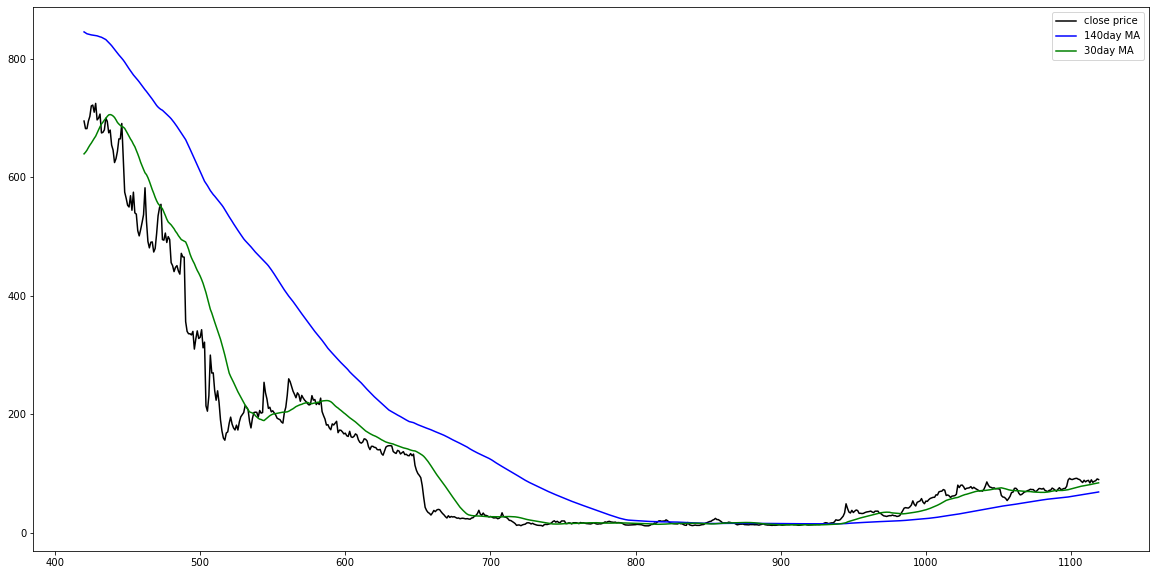

In [79]:
dataset_sample = dataset[:700]
plt.figure(figsize=(20, 10))
plt.plot(dataset_sample["Close"],color='black', label='close price')
plt.plot(dataset_sample["140day MA"],color='b', label='140day MA')
plt.plot(dataset_sample["30day MA"],color='g', label='30day MA')
plt.legend()
plt.show()

In [85]:
dataset["buy"] = np.where(((dataset["RSI"]< 40 )),1,0) # & (dataset["140day MA"]<dataset["Close"])
dataset["sell"] = np.where(((dataset["RSI"]> 70 ) | (dataset["140day MA"]>dataset["Close"])),1,0) 

#moving 
dataset["buy"] = np.where((dataset["140day MA"]<dataset["Close"]) & (dataset["30day MA"]<dataset["Close"] ),1,0)
dataset["sell"] = np.where((dataset["140day MA"]>dataset["Close"]) | (dataset["30day MA"]>dataset["Close"] ),1,0)

In [86]:
dataset[dataset["buy"] != 0]

,Close,High,Low,Open,RSI,140day MA,buy,sell,buy_spot,sell_spot,Tomorrows Returns,own,Strategy Returns,Cumulative Market Returns,Cumulative Strategy Returns,30day MA
816,20.120,21.9800,18.4000,18.42,66.860823,18.614997,1,0,0.0,0.0,2.100,True,2.100,-245.880,-433.050,14.370333
817,20.230,20.5500,18.1200,20.55,67.104983,18.574140,1,0,0.0,0.0,0.110,True,0.110,-245.770,-432.940,14.440667
818,19.370,20.4657,18.9401,20.01,63.268749,18.542569,1,0,0.0,0.0,-0.860,True,-0.860,-246.630,-433.800,14.548333
819,19.865,20.3300,19.4100,19.76,64.498399,18.501926,1,0,0.0,0.0,0.495,True,0.495,-246.135,-433.305,14.617333
820,19.890,20.5900,19.4200,19.70,64.561471,18.473819,1,0,0.0,0.0,0.025,True,0.025,-246.110,-433.280,14.708167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,109.350,109.3500,99.4597,105.85,64.372873,81.256618,1,0,0.0,0.0,5.600,False,0.000,-156.650,-409.190,86.957660
1177,97.450,107.9500,97.4500,107.95,54.088477,81.523404,1,0,0.0,0.0,-11.900,False,0.000,-168.550,-409.190,87.639327
1178,101.500,103.2000,98.4023,98.45,56.573959,81.715546,1,0,0.0,0.0,4.050,False,0.000,-164.500,-409.190,87.987660
1179,98.000,98.5000,97.2000,98.50,53.918637,81.932689,1,0,0.0,0.0,-3.500,False,0.000,-168.000,-409.190,88.470993


In [87]:
dataset["buy"] = np.where((dataset["buy"] == 1) &
                                  (dataset["buy"].shift(1) == 0), 1, 0)

dataset["buy_spot"] = np.where(
  (dataset["buy"] == 1), dataset["Close"], 0)

dataset["sell"] = np.where((dataset['sell'] == 1) &
                                (dataset['sell'].shift(1) == 0), 1, 0)

dataset["sell_spot"] = np.where(
  (dataset["sell"] == 1), dataset["Close"], 0)

In [88]:
dataset

,Close,High,Low,Open,RSI,140day MA,buy,sell,buy_spot,sell_spot,Tomorrows Returns,own,Strategy Returns,Cumulative Market Returns,Cumulative Strategy Returns,30day MA
420,695.07,703.06,695.00,702.22,50.669622,845.545429,0,0,0.0,0.0,-7.080,True,-7.08,429.07,241.90,639.675667
421,682.30,695.01,675.00,690.00,48.887250,844.074429,0,0,0.0,0.0,-12.770,True,-12.77,416.30,229.13,642.410667
422,682.32,682.32,682.01,682.01,48.890214,842.398071,0,0,0.0,0.0,0.020,True,0.02,416.32,229.15,645.820667
423,695.00,705.00,675.00,675.00,50.794450,841.757500,0,0,0.0,0.0,12.680,True,12.68,429.00,241.83,650.290000
424,703.00,705.44,694.75,694.75,51.982576,841.007500,0,0,0.0,0.0,8.000,True,8.00,437.00,249.83,654.357333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,88.00,88.25,85.50,85.50,50.831022,84.980994,1,0,88.0,0.0,3.625,False,0.00,-178.00,-409.19,87.740420
1207,80.40,80.40,80.40,80.40,43.188832,85.147066,0,1,0.0,80.4,-7.600,False,0.00,-185.60,-409.19,87.028753
1208,81.00,81.00,80.10,80.60,43.889874,85.242780,0,0,0.0,0.0,0.600,False,0.00,-185.00,-409.19,86.460420
1209,84.05,84.05,84.05,84.05,47.365298,85.328494,0,0,0.0,0.0,3.050,False,0.00,-181.95,-409.19,85.777087


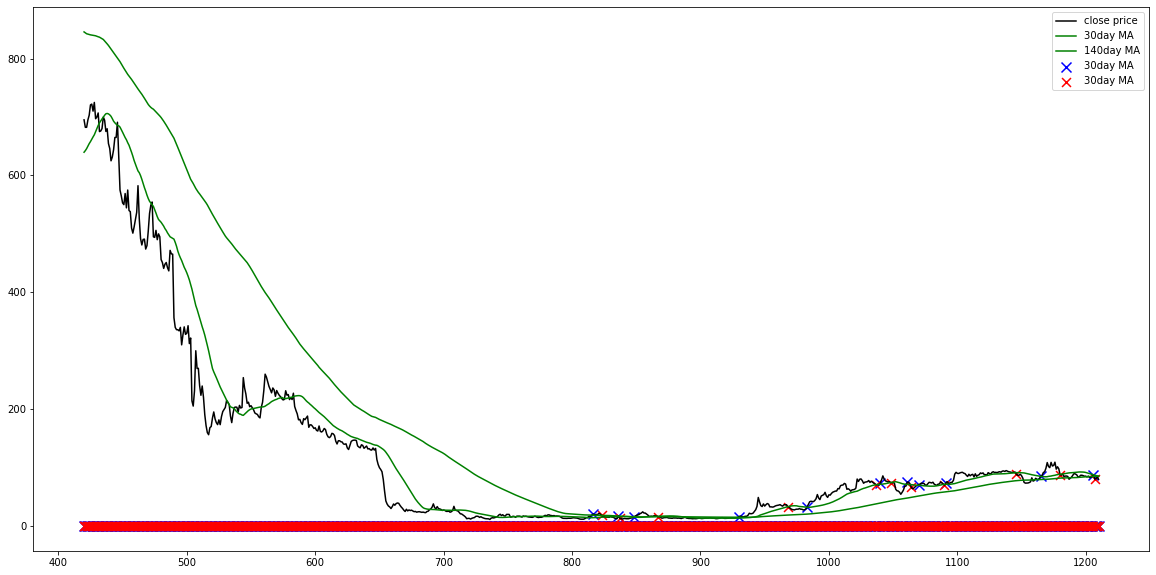

In [90]:
dataset_sample = dataset[:1000]
plt.figure(figsize=(20, 10))
plt.plot(dataset_sample["Close"],color='black', label='close price')
plt.plot(dataset_sample["30day MA"],color='g', label='30day MA')
plt.plot(dataset_sample["140day MA"],color='g', label='140day MA')
plt.scatter(dataset_sample.index,dataset_sample["buy_spot"],color='b', label='30day MA', marker="x",s=100)
plt.scatter(dataset_sample.index,dataset_sample["sell_spot"],color='r', label='30day MA', marker="x",s=80)
plt.legend()
plt.show()

In [91]:
dataset['Tomorrows Returns'] = 0.
dataset['Tomorrows Returns'] = dataset['Close'] - dataset['Close'].shift(1)
dataset

,Close,High,Low,Open,RSI,140day MA,buy,sell,buy_spot,sell_spot,Tomorrows Returns,own,Strategy Returns,Cumulative Market Returns,Cumulative Strategy Returns,30day MA
420,695.07,703.06,695.00,702.22,50.669622,845.545429,0,0,0.0,0.0,NaN,True,-7.08,429.07,241.90,639.675667
421,682.30,695.01,675.00,690.00,48.887250,844.074429,0,0,0.0,0.0,-12.770,True,-12.77,416.30,229.13,642.410667
422,682.32,682.32,682.01,682.01,48.890214,842.398071,0,0,0.0,0.0,0.020,True,0.02,416.32,229.15,645.820667
423,695.00,705.00,675.00,675.00,50.794450,841.757500,0,0,0.0,0.0,12.680,True,12.68,429.00,241.83,650.290000
424,703.00,705.44,694.75,694.75,51.982576,841.007500,0,0,0.0,0.0,8.000,True,8.00,437.00,249.83,654.357333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,88.00,88.25,85.50,85.50,50.831022,84.980994,1,0,88.0,0.0,3.625,False,0.00,-178.00,-409.19,87.740420
1207,80.40,80.40,80.40,80.40,43.188832,85.147066,0,1,0.0,80.4,-7.600,False,0.00,-185.60,-409.19,87.028753
1208,81.00,81.00,80.10,80.60,43.889874,85.242780,0,0,0.0,0.0,0.600,False,0.00,-185.00,-409.19,86.460420
1209,84.05,84.05,84.05,84.05,47.365298,85.328494,0,0,0.0,0.0,3.050,False,0.00,-181.95,-409.19,85.777087


In [92]:
own = False
own_days = []
accumulated_market_return = 0
accumulated_stradegy_return = 0

for indx, row in dataset.iterrows():
    if row["buy_spot"] != 0:
        own = True
    if row["sell_spot"] != 0:
        own = False
    own_days.append(own)   
      
dataset["own"] = own_days

In [93]:
dataset['Strategy Returns'] = 0.
dataset['Strategy Returns'] = np.where(
  dataset['own'] == True, dataset['Tomorrows Returns'], 0)
dataset['Cumulative Market Returns'] = np.cumsum(
  dataset['Tomorrows Returns'])
dataset['Cumulative Strategy Returns'] = np.cumsum(
  dataset['Strategy Returns'])
dataset["buy"] = np.where((dataset['own'] == True) &
                              (dataset['own'].shift(1) == False), 1, 0)

In [94]:
dataset

,Close,High,Low,Open,RSI,140day MA,buy,sell,buy_spot,sell_spot,Tomorrows Returns,own,Strategy Returns,Cumulative Market Returns,Cumulative Strategy Returns,30day MA
420,695.07,703.06,695.00,702.22,50.669622,845.545429,0,0,0.0,0.0,NaN,False,0.000,NaN,0.000,639.675667
421,682.30,695.01,675.00,690.00,48.887250,844.074429,0,0,0.0,0.0,-12.770,False,0.000,-12.77,0.000,642.410667
422,682.32,682.32,682.01,682.01,48.890214,842.398071,0,0,0.0,0.0,0.020,False,0.000,-12.75,0.000,645.820667
423,695.00,705.00,675.00,675.00,50.794450,841.757500,0,0,0.0,0.0,12.680,False,0.000,-0.07,0.000,650.290000
424,703.00,705.44,694.75,694.75,51.982576,841.007500,0,0,0.0,0.0,8.000,False,0.000,7.93,0.000,654.357333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,88.00,88.25,85.50,85.50,50.831022,84.980994,1,0,88.0,0.0,3.625,True,3.625,-607.07,130.225,87.740420
1207,80.40,80.40,80.40,80.40,43.188832,85.147066,0,1,0.0,80.4,-7.600,False,0.000,-614.67,130.225,87.028753
1208,81.00,81.00,80.10,80.60,43.889874,85.242780,0,0,0.0,0.0,0.600,False,0.000,-614.07,130.225,86.460420
1209,84.05,84.05,84.05,84.05,47.365298,85.328494,0,0,0.0,0.0,3.050,False,0.000,-611.02,130.225,85.777087


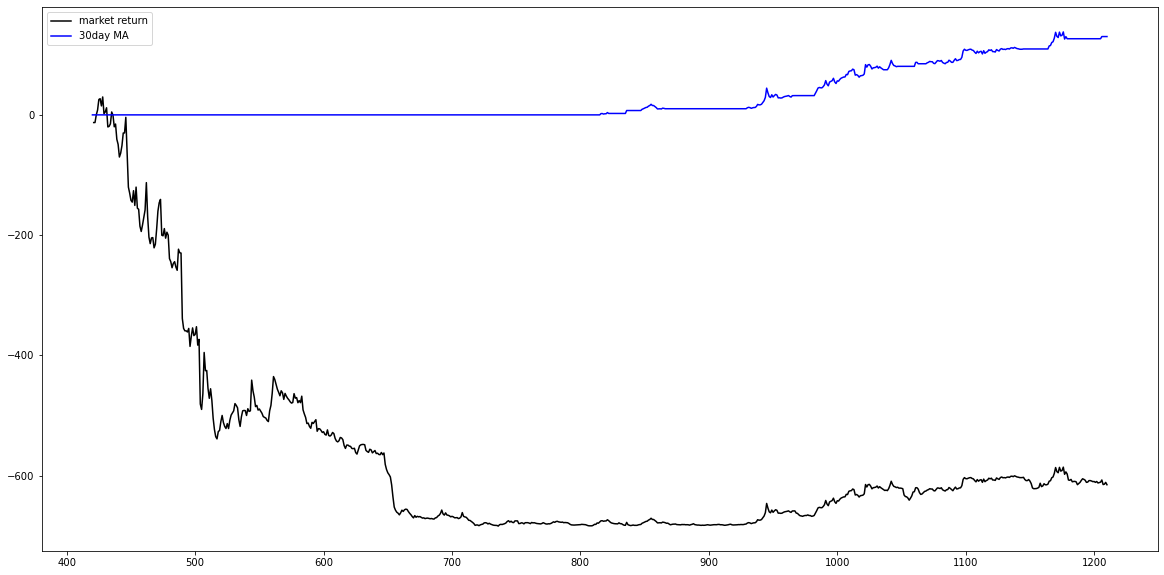

In [95]:
dataset_sample = dataset
plt.figure(figsize=(20, 10))
plt.plot(dataset_sample["Cumulative Market Returns"],color='black', label='market return')
plt.plot(dataset_sample["Cumulative Strategy Returns"],color='b', label='30day MA')
# plt.scatter(dataset_sample.index,dataset_sample["buy_spot"],color='b', label='30day MA', marker="x",s=80)
# plt.scatter(dataset_sample.index,dataset_sample["sell_spot"],color='r', label='30day MA', marker="x",s=80)
plt.legend()
plt.show()

In [96]:
print("the total accumilated market return is: ", dataset["Cumulative Market Returns"].iloc[-1])
print("the total accumilated Strategy return is: ", dataset["Cumulative Strategy Returns"].iloc[-1])

the total accumilated market return is:  -614.9700000000003
the total accumilated Strategy return is:  130.22500000000002
